# Método Montecarlo

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn

## Ejemplo: Dado Piramidal

Se describe con el ejemplo aportado en clase (autoría *F. Cristancho*) como se resuelve la simulación por Montecarlo. Se hará una apreciación de cada paso y descripción de las componentes. 

Del **dado piramidal** obtenemos
- `pdf`: "Función de densidad de probabilidad" (PDF), se dará la gráfica básicamente.


In [3]:
histograma = np.array([0]*8)
pdf = np.array([0,1/6,1/4,1/6,1/6,1/12,1/6])

histograma, pdf

(array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.        , 0.16666667, 0.25      , 0.16666667, 0.16666667,
        0.08333333, 0.16666667]))

Se inicializan variables de interes:
- `dim_pdf`: Indicará el tamaño de del array de `pdf`.
- `F`: Función Acumulativa de probabilidad. Inicialización.
- `historias`: Número de historias, i.e. número de veces que lanza el dado


array([0.        , 0.16666667, 0.41666667, 0.58333333, 0.75      ,
       0.83333333, 1.        ])

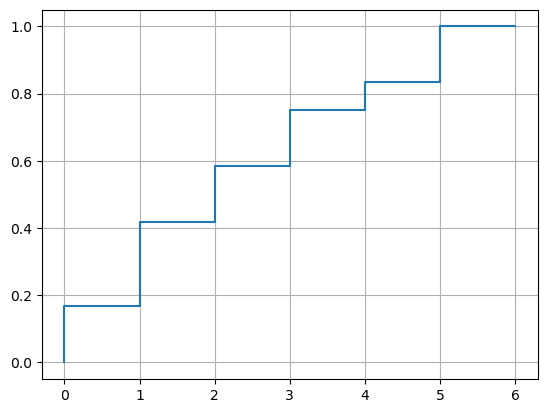

In [52]:
dim_pdf = len(pdf)
F = np.zeros(dim_pdf)
historias = 1000

# Acumulación de F
for i in np.arange(1,dim_pdf):
    F[i] = F[i-1] + pdf[i]

# Mostrar distribucion acumulada
plt.plot(F, ds='steps')
plt.grid()

F

Establecemos la 'semilla' incial, teniendo en cuenta para relacionar la información con demás pruebas posteriores. En el proceso abajo, se generan los experimentos o historias, los valores aleatorios caerán en algún punto de la distribución acumulada.

In [74]:
#rn.seed(123)
# Por cada historia
for i in range(historias):
    r = rn.random()
    # Busqueda ubicacion en el histograma
    for j in np.arange(1,dim_pdf):
        if r >= F[j-1] and r < F[j]:
            bingo = j
            break
    histograma[bingo] += 1

histograma

array([  0, 517, 709, 481, 547, 228, 518], dtype=int64)

Se genera la gráfica que permita verificar los resultados descritos anteriormente

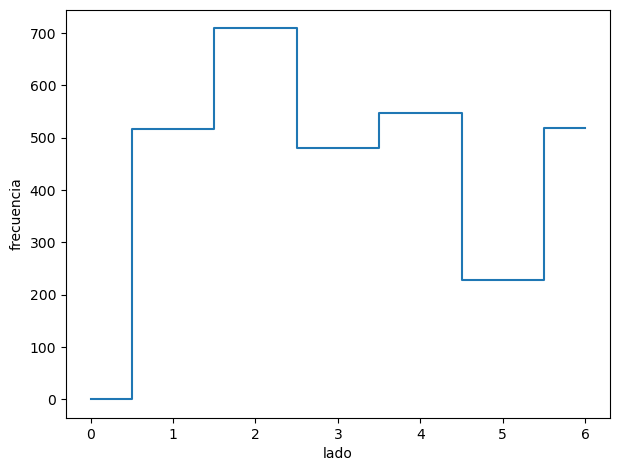

In [79]:
fig = plt.figure(1)
ax = fig.add_axes([0.1,0.1,0.85,0.85])
ax.set_xlabel('lado')
ax.set_ylabel('frecuencia')

x = np.arange(0,(len(histograma)))
plt.plot(x, histograma, ds='steps-mid')

## Otro ejemplo

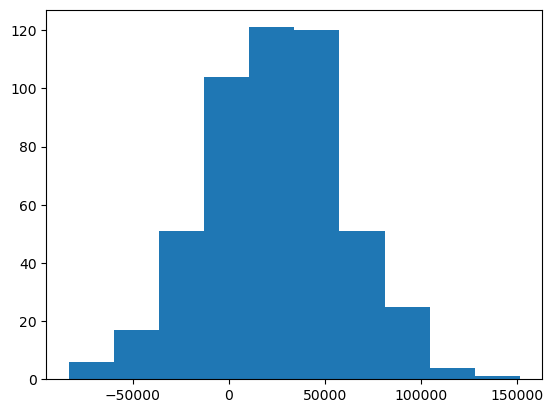

In [84]:
obs = 500
# input vectors
price = np.random.normal(10, 3, obs)
marginal = np.random.normal(7, 2, obs)
demand = np.random.uniform(8000, 12000, obs)
# compute result
tp = demand * (price - marginal) - 5000
plt.figure()
plt.hist(tp)
plt.show()

## Simplificación ChatGPT

Se distingue por utilizar las herramientas proveídas por la librería `numpy`.

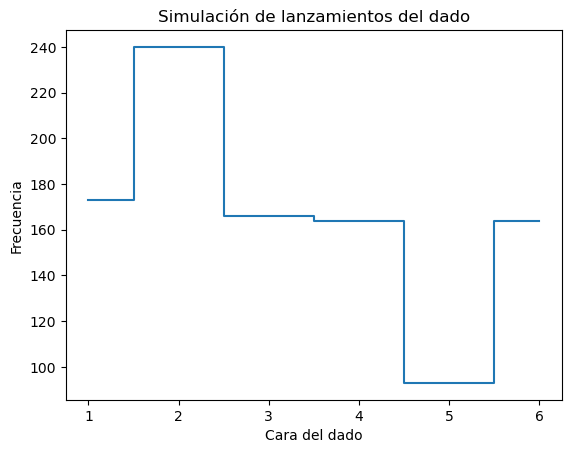

array([  0, 173, 240, 166, 164,  93, 164], dtype=int64)

In [97]:
# Definición de PDF (probabilidad para cada cara del dado piramidal)
pdf = np.array([0, 1/6, 1/4, 1/6, 1/6, 1/12, 1/6])
cdf = np.cumsum(pdf)  # Cálculo de la función de distribución acumulativa (CDF)

# N = Número de historias (número de lanzamientos del dado)
N = 1000

# Generación de N números aleatorios entre 0 y 1
random_numbers = np.random.rand(N)

# Determinación de las caras correspondientes usando la CDF
bingo_indices = np.searchsorted(cdf, random_numbers)

# Creación del histograma
histograma, _ = np.histogram(bingo_indices, bins=np.arange(len(pdf) + 1))

# Visualización del histograma
caras = np.arange(1, len(pdf))
plt.plot(caras, histograma[1:], ds='steps-mid')
plt.xticks(caras)
plt.xlabel('Cara del dado')
plt.ylabel('Frecuencia')
plt.title('Simulación de lanzamientos del dado')
plt.show()

histograma



## Tarea: Modelo climático

### Problema

La probabilidad de que llueva (en Bogotá) crece linealmente desde cero a partir de las 6 am hasta tomar su máximo
a las 2 pm. Luego decrece hasta llegar a cero a las 6 pm.

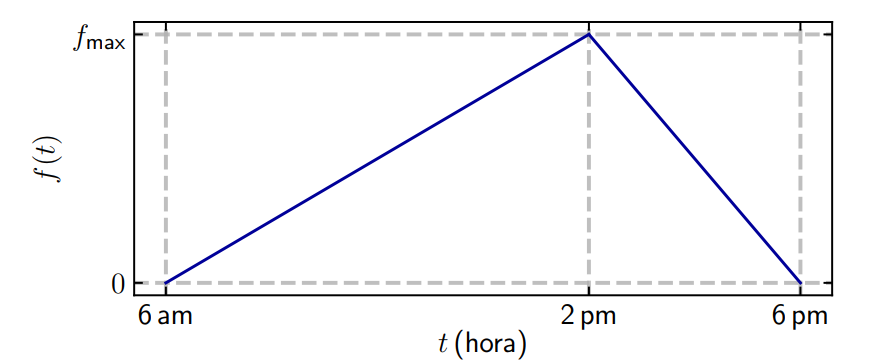

### Preguntas

#### 1. **Densidad de probabilidad**
Resolvemos primero el máximo para este problema utilizando geometría.

$$\text{area} = \frac{12 f_{max}}{2} = 1 \quad \Leftrightarrow \quad f_{max} = \frac{1}{6}$$

Luego, definimos esta función $P$ de *pdf* como:

$$P(x) = \left\{ \begin{array}{lcc} 0 & si & x < 6 \\  (1/48) x - (3/24) & si & 6 \leq x \leq 14 \\  -(1/24) x + (3/4) & si & 14 < x \leq 18 \\  0 & si & x > 18 \end{array} \right. $$

Se define el objeto `prob_lluvia(periodo)` para definir un estado general de lo relacionado con el problema, tanto su *pdf* con `P(x)`, las funciones que definen la probabilidad `.integral(hora)` y `.promedio(hora)`.

In [ ]:
class prob_lluvia:
    """"Clase que define las probabilidades según conveniencia e inicializa los valores"""
    def __init__(self, periodo):
        """Se inicializan las variables y se establece la particion x_vals.
        El periodo debe entrar lo mejor posible en el rango."""
        self.periodo = periodo
        self.empieza = 6
        self.termina = 18
        self.f_max = 1/6

        # particion
        self.particion = int((self.termina - self.empieza) / self.periodo) + 1
        self.x_vals = np.linspace(self.empieza, self.termina, num=self.particion)

    def P(self, x):
        """Función de densidad de probabilidad."""
        if x < 6:
            return 0
        elif 6 <= x <= 14:
            return (1/48) * x - (3/24)
        elif 14 < x <= 18:
            return -(1/24) * x + (3/4)
        elif x > 18:
            return 0

    def floor(self, hora):
        for x in self.x_vals:
            if hora >= x and hora < (x + self.periodo) and not(np.isclose(hora, x + self.periodo, atol=1e-4)): return x
        return 0

    def integral(self, hora):
        '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
        como el area en el periodo de la función discretizada'''
        if hora < self.empieza or hora > self.termina: return 0
        hora = self.floor(hora)
        return self.periodo * (np.max([self.P(hora), self.P(hora + self.periodo)]) + np.min([self.P(hora), self.P(hora + self.periodo)])) / 2
    
    def promedio(self, hora):
        '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
        como media entre la función discretizada por el periodo.'''
        if hora < self.empieza or hora > self.termina: return 0
        hora = self.floor(hora)
        return np.abs(self.P(hora + self.periodo) + self.P(hora))/2

# Algunas comprobaciones
pl1 = prob_lluvia(periodo = 1)
print(f"""
      Probabilidad: {pl1.integral(8.7)} 
      Probabilidad total promedio: {np.sum([pl1.promedio( hora ) for hora in np.arange(6, 18)]):.4f}
      Probabilidad total integral: {np.sum([pl1.integral( hora ) for hora in np.arange(6, 18)]):.4f}
""")

#Diferencias
list([pl1.integral(hora) - pl1.promedio(hora) for hora in np.arange(6, 18)])


      Probabilidad: 0.05208333333333333 
      Probabilidad total promedio: 1.0000
      Probabilidad total integral: 1.0000



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Se comprueba entonces que:
- Las funciones de probabilidad están normalizadas a 1.
- Las diferencias entre las formas de tomar la probabilidad son despreciables.

#### 2. **Obtener $f_{max}$**
Cómo se indicó en el punto previo, se resolvió tomando geométricamente el área y resolviendo el punto máximo para que la función de probabilidad fuera normalizada a 1. Como se sugiere también, dado que $f_{max}$ es el carácter que provee a la función la normalizacion, que se pueda generalizar como:

$$\text{area} = \frac{12 f_{max}}{2} = N \quad \Leftrightarrow \quad f_{max} = \frac{N}{6}$$

Luego, definimos esta función $P$ de *pdf* como:

$$P(x) = \left\{ \begin{array}{lcc} 0 & si & x < 6 \\  f_{max}((1/8) x - (3/4)) & si & 6 \leq x \leq 14 \\  f_{max}(-(1/4) x + (9/2)) & si & 14 < x \leq 18 \\  0 & si & x > 18 \end{array} \right. $$

Podemos despejar la normalización para tenerla como parámetro en nuestro objeto `prob_lluvia` y de esa manera generalizarlo aún más.

# Tests

In [ ]:
def P(x):
    if x < 6:
        return 0
    elif 6 <= x <= 14:
        return (1/48) * x - (3/24)
    elif 14 < x <= 18:
        return -(1/24) * x + (3/4)
    elif x > 18:
        return 0

def prob_lluvia_inte(hora):
    '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
    como el area en el periodo de la función discretizada'''
    f_max = 1/6
    periodo = 1 # hora
    empieza = 6 # 6 am
    termina = 18 # 6 pm
    particion = (termina - empieza) / periodo
    
    if hora < empieza or hora > termina: return 0
    hora = np.floor(hora)
    return periodo * (np.max([P(hora), P(hora + periodo)]) + np.min([P(hora), P(hora + periodo)])) / 2

def prob_lluvia_prom(hora):
    '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
    como media entre la función discretizada por el periodo.'''
    periodo = 1 # hora
    empieza = 6 # 6 am
    termina = 18 # 6 pm
    f_max = 1/6
    if hora < empieza or hora > termina: return 0
    hora = np.floor(hora)
    return np.abs(P(hora + periodo) + P(hora))/2

# Comprobaciones
def comprobaciones(hora):
    print(f"Probabilidad de llover (como media): {prob_lluvia_prom(hora):.3e}")
    print(f"La suma de las probabilidades (como media): {np.sum([prob_lluvia_prom(i) for i in range(6,18)]):.3f}") # Debe dar 1.0

    print(f"Probabilidad de llover (como integral):{prob_lluvia_inte(hora):.3e}")
    print(f"La suma de las probabilidades (como integral): {np.sum([prob_lluvia_inte(i) for i in range(6, 18)]):.3f}") # Debe dar 1.0
comprobaciones(14)

[prob_lluvia_prom(i) - prob_lluvia_inte(i) for i in np.arange(6, 18)]

Probabilidad de llover (como media): 1.666e-01
La suma de las probabilidades (como media): 1000.000
Probabilidad de llover (como integral):1.666e-04
La suma de las probabilidades (como integral): 1.000


[1.0406249999998854e-05,
 0.020822906249999995,
 0.04163540624999999,
 0.06244790624999998,
 0.08326040624999997,
 0.10407290624999999,
 0.12488540624999998,
 0.14569790624999995,
 0.1664791875,
 0.12485418750000003,
 0.08322918750000001,
 0.04160418750000005]